# 1. Multi Layer Perceptron

También conocida como _feed forward neural network_ es la red neuronal más conocida y general de todas.
Este tipo de arquitectura consta de muchas **neuronas** conectadas entre sí, con pocas o ninguna **capa escondida**
entre la entrada y la salida.

En este documento se implementa una MLP para clasificar el conjunto de Iris, el _hola mundo_ de los algoritmos de Machine Learning e Inteligencia Computacional.

In [12]:
from sklearn import datasets, preprocessing, model_selection
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation

sns.set()

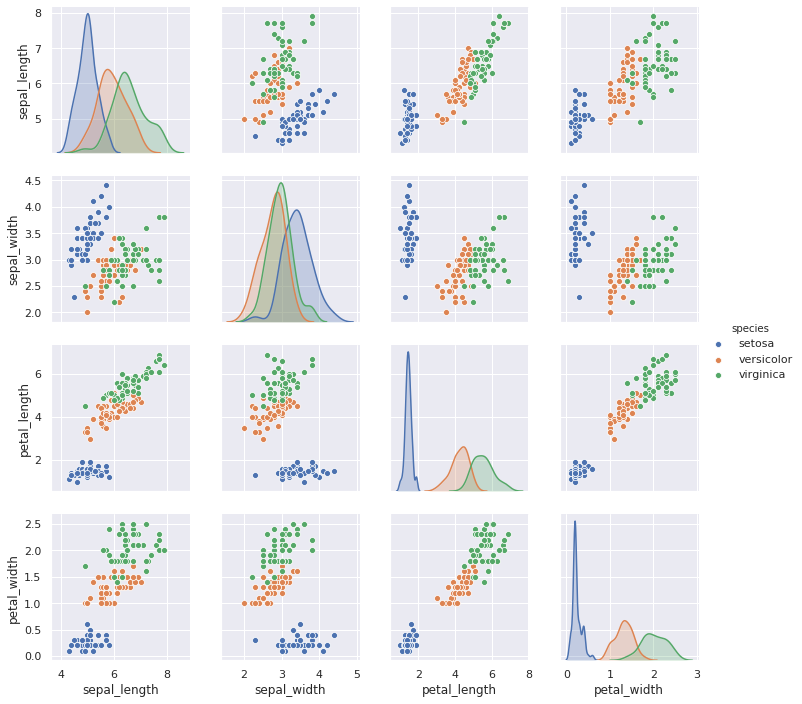

In [13]:
# Importar los datos, y realizar una exploración general
datos = sns.load_dataset("iris")
sns.pairplot(datos, hue="species")

Como se conoce, este conjunto de datos cuenta con 3 clases y 4 características, que se pueden ver hasta abajo en la figura de visualización. Este conjunto de datos contiene 150 _ejemplos,_ por lo que es un conjunto muy pequeño de datos.

Esto es algo importante a tomar en cuenta al momento de crear un diseño de arquitectura de redes neuronales, dado que son pocos datos se puede emplear un diseño simple, sin tanta profundidad.

In [14]:
# Convertir los datos a arreglos de numpy
X = datos.loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
y_nombres = datos["species"].to_numpy()

# Y cambiar los nombres a valores mediante One Hot encoding
enc = preprocessing.OneHotEncoder()
y_one_hot = enc.fit_transform(y_nombres.reshape(-1, 1)).toarray()

In [15]:
# Separar el conjunto de datos en prueba y entrenamiento, 80-20
# y definir una semilla para reproducibilidad
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y_one_hot,
                                                                    test_size=0.2,
                                                                   random_state=52)

Retomando las lecciones del _Deep Learning,_ se codifican las clases de forma categórica mediante _One Hot encoding_, esto para facilitar el aprendizaje y aplicación la arquitectura del MLP.

## Arquitectura del MLP

Ahora se pretende crear un MLP con una entrada, una capa oculta con 4 unidades escondidas, y una salida.

Dado que es un problema de clasificación se aplicará la función de activación ReLU, y la salida será _softmax_ categórica.

In [16]:
# Definir el número total de clases
num_clases = len(set(y_nombres))

# Se crea el modelo de keras
modelo = Sequential()

### Primera capa

Es la **entrada** del MLP, por lo que debe de tener el número total de **características** total en el conjunto de datos.

In [17]:
modelo.add(Dense(1, input_shape=(X.shape[1],)))

### Capas ocultas

En este caso se decidió por una capa oculta única con 4 unidades y función de activación ReLU.

In [18]:
modelo.add(Dense(4, activation="relu"))

### Última capa

Esta última capa corresponde a la **salida** del MLP, por lo que debe de tener el número exacto de **clases** a clasificar por el modelo.

Adicionalmente, como es clasificación, la última capa debe tener la función de activación _softmax_.

In [19]:
modelo.add(Dense(num_clases, activation="softmax"))

## Compilación del modelo y entrenamiento

Ahora que ya se tiene el modelo y arquitectura construidos, se procede a seleccionar un optimizador, número de iteraciones para entrenar y realizar el entrenamiento.

Por ahora, se utilizará Descenso Gradiante Estocástico básico, durante 500 épocas.

In [20]:
modelo.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Entrenamiento

En este paso se llama el modelo durante un número fijo de iteraciones para realizar el entrenamiento, con el conjunto separado para entrenamiento.

En este paso se fija el número de lote a 16, pero este es un _hiperparámetro_ que puede ser modificado según el caso y el problema en cuestión.

In [21]:
# Se pone verbose=0 para evitar toda la salida del entrenamiento
# Y evitar el reordenamiento para mantener reproducibilidad
modelo.fit(x_train, y_train,
          epochs=500,
          batch_size=16,
          verbose=0,
          shuffle=False)

### Prueba

Ahora, con el conjunto de prueba se valida el modelo y se ve qué tan efectivo fue.

In [22]:
modelo.evaluate(x_test, y_test, batch_size=16)

30/30 [==============================] - 0s 2ms/step


[0.18322885930538177, 0.9666666666666667]

Como se puede ver, no se logra un mínimo de 0, pero está cerca.

Por otro lado, la precisión de clasificación es de 96.6% para este conjunto de datos pequeño. ¿Se puede mejorar este resultado?

## Ejercicio

- Experimentar con el `batch_size`, el número de unidades en todas las capas excepto la última y el optimizador para lograr una clasificación perfecta.

**NOTA:** Nótese que nunca se comparó el resultado de entrenamiento y prueba para comprobar el sobreajuste, ¿será importante considerarlo?